<a href="https://colab.research.google.com/github/jansiddiqui/Learning-MachineLearning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Work Flow

Gold Price Data -> Data Preprocessing -> Data Analysis -> Train Test Split -> Random Forest Regressor -> Evaluation

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Cllectiong & Processing

In [2]:
#loading csv file to pandas dataframe
df = pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
#number of rows and column
df.shape

(2290, 6)

In [6]:
#getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
#getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
df.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


Correlation:
1. Positive Correlation
2. Negative Correlation

In [15]:
correlation = df.corr(numeric_only=True)

<Axes: >

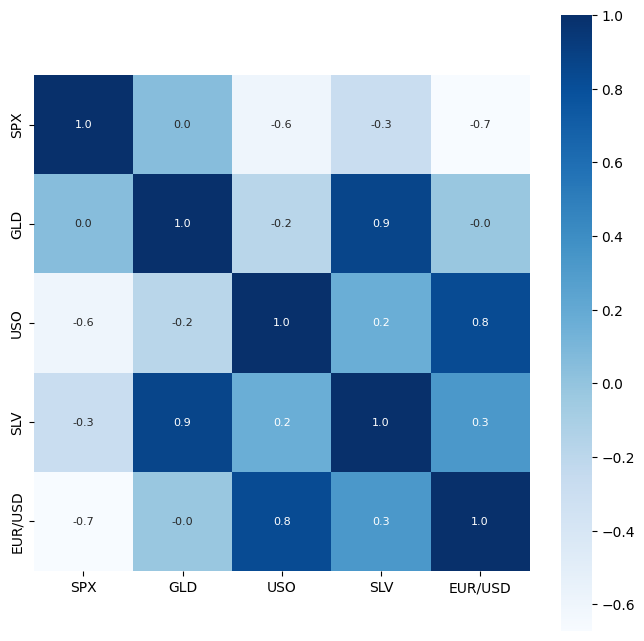

In [16]:
#constcorrelationructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
# Correlatiuon values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


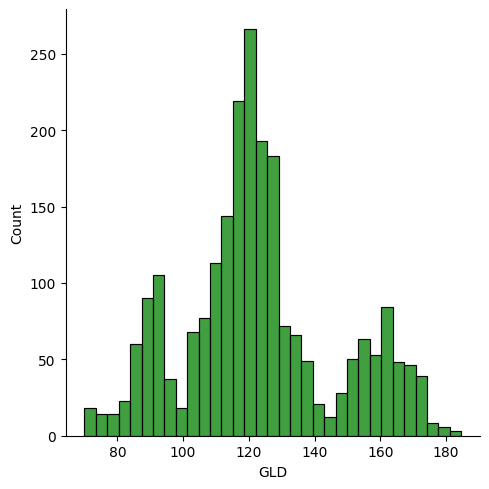

In [18]:
# Checking the distribution of gold price
sns.displot(df['GLD'], color='green')

Splitting the Features and the Target

In [22]:
X = df.drop(['Date', 'GLD'], axis=1)
Y = df['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

MOdel Evaluation

In [28]:
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[168.65619909  82.13149976 115.93690049 127.64980085 120.80590139
 154.79329707 150.182798   125.98990019 117.47399889 125.88310115
 116.424301   172.14420103 141.52009788 168.13929857 114.99629984
 117.79970065 138.70490328 170.05210103 159.52700321 159.85289949
 155.09130055 125.44370021 175.70479992 157.57580341 125.28519999
  93.88399962  77.86319993 120.36570007 119.18849972 167.5718995
  88.20880042 125.31060008  91.23920075 117.53820029 121.18729887
 137.62290059 115.65810113 115.51790105 147.07419966 107.24680085
 104.36070242  87.14649796 126.59310067 117.90489983 152.62779907
 119.77090023 108.33259978 107.91929839  93.10539998 127.07829783
  74.81730044 113.71419918 121.53170005 111.18939933 118.75059879
 121.29549891 160.24809993 168.42690031 147.20269713  85.91839869
  94.21380041  86.72039875  90.62730046 119.01930052 126.41410058
 127.56580013 169.79139952 122.31069933 117.37319901  98.69690007
 168.33020147 142.94469765 131.31140206 121.16360236 121.12419924
 119.644200

In [31]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9889926132532416


Compare the actual and the predicted values

In [32]:
Y_test = list(Y_test)

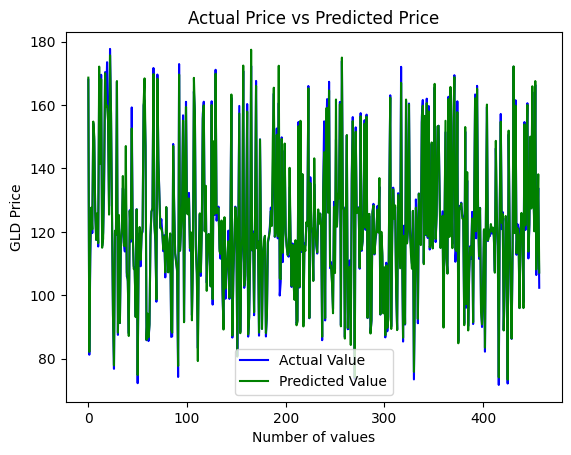

In [34]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()